In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import rcParams

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale

In [2]:
dataset=pd.read_excel(r'D:\Sibina\ICT academy\Case Studies\Case Study#07\iris.xls')
dataset.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# pre-processing 

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
dataset.shape

(150, 5)

In [5]:
dataset.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [6]:
dataset.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [7]:
dataset.nunique()

SL                35
SW                23
PL                43
PW                22
Classification     3
dtype: int64

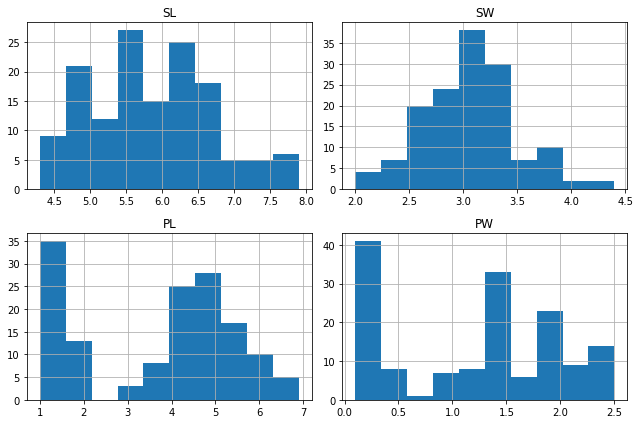

In [8]:
freqgraph=dataset.select_dtypes(include=['float','int64'])#only float,int64 dtype column values are plotted
freqgraph.hist(figsize=(9,6))
plt.tight_layout()
plt.show()

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SL', ylabel='Density'>

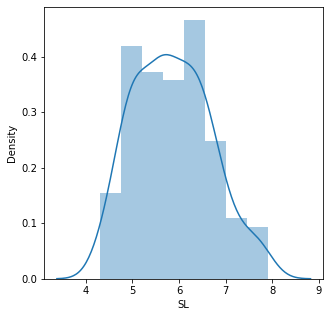

In [9]:
fig,ax=plt.subplots(figsize=(5,5))
sns.distplot(dataset.SL)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SW', ylabel='Density'>

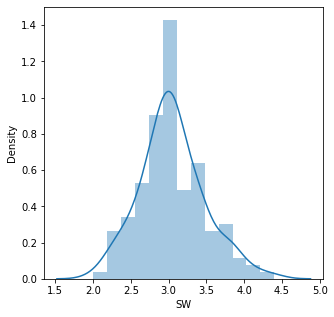

In [10]:
fig,ax=plt.subplots(figsize=(5,5))
sns.distplot(dataset.SW)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PL', ylabel='Density'>

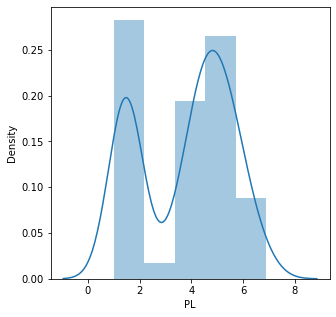

In [11]:
fig,ax=plt.subplots(figsize=(5,5))
sns.distplot(dataset.PL)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PW', ylabel='Density'>

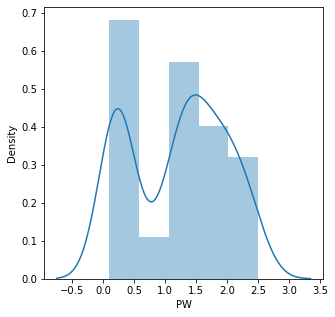

In [12]:
fig,ax=plt.subplots(figsize=(5,5))
sns.distplot(dataset.PW)

In [13]:
dataset.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Inferences:(a). SL,SW columns are normally distributed; so the missing values can be filled with mean value of the column

In [15]:
dataset['SL']=dataset['SL'].fillna(dataset['SL'].mean())
dataset['SW']=dataset['SW'].fillna(dataset['SW'].mean())
dataset.isna().sum()

SL                0
SW                0
PL                6
PW                0
Classification    0
dtype: int64

<AxesSubplot:title={'center':'Boxplot-SL'}, xlabel='SL'>

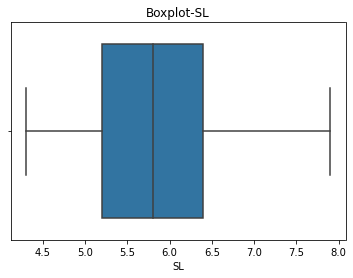

In [16]:
plt.title('Boxplot-SL')
sns.boxplot(x='SL',data=dataset)

<AxesSubplot:title={'center':'Boxplot-SW'}, xlabel='SW'>

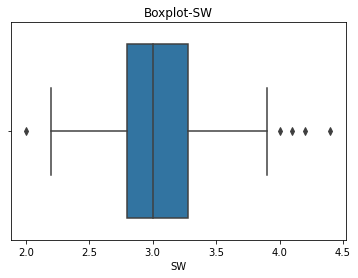

In [17]:
plt.title('Boxplot-SW')
sns.boxplot(x='SW',data=dataset)

Outliers are present in SW data. Prior to building an ML Model, the outliers has to be removed

(b). PL column is not normally distributed. Checking for mean,median and outliers :

mean PL: 3.756250000000003
median PL: 4.35


<AxesSubplot:title={'center':'Boxplot-PL'}, xlabel='PL'>

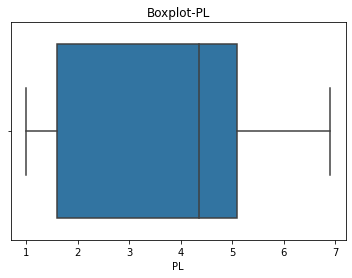

In [18]:
print('mean PL:',dataset['PL'].mean())
print('median PL:',dataset['PL'].median())
plt.title('Boxplot-PL')
sns.boxplot(x='PL',data=dataset)

No outliers present in PL; so filling the missing value with the median value.

In [20]:
dataset['PL']=dataset['PL'].fillna(dataset['PL'].median())
dataset.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Checking for outliers in PW column

<AxesSubplot:title={'center':'Boxplot-PW'}, xlabel='PW'>

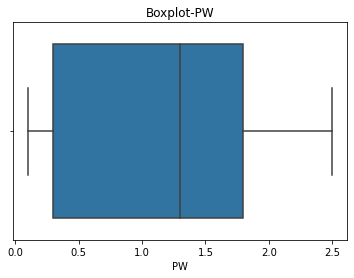

In [22]:
plt.title('Boxplot-PW')
sns.boxplot(x='PW',data=dataset)

Removing the outliers present in the SW column:

In [23]:
Q1=np.percentile(dataset['SW'],25,interpolation='midpoint')
Q2=np.percentile(dataset['SW'],50,interpolation='midpoint')
Q3=np.percentile(dataset['SW'],75,interpolation='midpoint')
print('Q1:',Q1)
print('Q2:',Q2)
print('Q3:',Q3)
IQR=Q3-Q1
print('IQR of SW=',IQR)

Q1: 2.8
Q2: 3.0
Q3: 3.25
IQR of SW= 0.4500000000000002


In [24]:
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
print('Lower Limit_SW:',lower_limit)
print('Upper Limit_SW:',upper_limit)

Lower Limit_SW: 2.1249999999999996
Upper Limit_SW: 3.9250000000000003


In [25]:
#Removing outliers above and below upper and lower limits
outlier=[]
for x in dataset['SW']:
    if x>upper_limit or x<lower_limit:
        outlier.append(x)
print('Outliers of SW data=',outlier)
print('The corresponding indexes are as follows:')
ind1=dataset['SW'][(dataset['SW']<lower_limit)|(dataset['SW']>upper_limit)].index
dataset.loc[ind1].index

Outliers of SW data= [4.0, 4.4, 4.1, 4.2, 2.0]
The corresponding indexes are as follows:


Int64Index([14, 15, 32, 33, 60], dtype='int64')

In [26]:
dataset.drop([14, 15, 32, 33, 60],inplace=True)

<AxesSubplot:title={'center':'Boxplot-SW'}, xlabel='SW'>

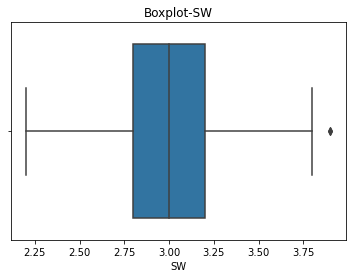

In [27]:
plt.title('Boxplot-SW')
sns.boxplot(x='SW',data=dataset)

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              145 non-null    float64
 1   SW              145 non-null    float64
 2   PL              145 non-null    float64
 3   PW              145 non-null    float64
 4   Classification  145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


Hence the outliers and null elements are treated, the dataset is ready for further analysis using ML models- classification algorithms.

<AxesSubplot:>

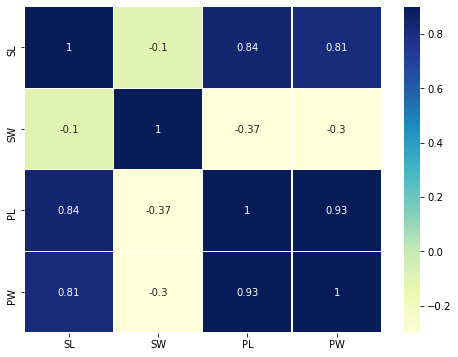

In [30]:
corr= dataset.corr()
plt.subplots(figsize=(8,6))
sns.heatmap(corr,vmin=-0.3, vmax=0.9,linewidths=0.2,annot=True,cmap="YlGnBu")

Target column consist of :

In [31]:
dataset['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

The label encoding of "Classification" feature is not necessary(as its the target in the problem).

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

(i). logistic regression

(ii). K-NN Model

(iii). Decision Tree classifier

(iv). SVM

(v). Random Forest Method

(vi). Gradient Boosting

(vii). Extreme Gradient Boosting

(i). logistic regression

In [33]:
y=dataset['Classification']
x=dataset.drop('Classification',axis=1)

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [35]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [37]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test, y_pred,pos_label='positive',average='macro'))
print('recall:',recall_score(y_test, y_pred,pos_label='positive',average='macro'))
print('f1_score:',f1_score(y_test, y_pred,pos_label='positive',average='macro'))

accuracy: 0.9310344827586207
precision: 0.9326599326599326
recall: 0.9326599326599326
f1_score: 0.9326599326599326


C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [38]:
a1=accuracy_score(y_test,y_pred)
p1=precision_score(y_test, y_pred,pos_label='positive',average='macro')
r1=recall_score(y_test, y_pred,pos_label='positive',average='macro')
f1=f1_score(y_test, y_pred,pos_label='positive',average='macro')
performance1=pd.DataFrame([a1,p1,r1,f1])
performance1.columns=['logistic regression']     

C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [39]:
cm1=confusion_matrix(y_test,y_pred)

In [40]:
cm_df=pd.DataFrame(cm1,index=['Iris-setosa','Iris-versicolor','Iris-virginica'],columns=['Iris-setosa','Iris-versicolor','Iris-virginica'])

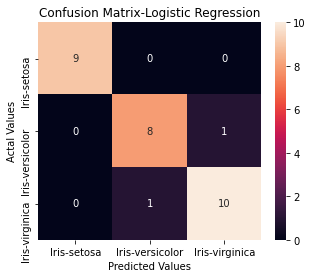

In [41]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix-Logistic Regression')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

(ii). K-NN Model

In [45]:
from sklearn.neighbors import KNeighborsClassifier
#finding optimum value of K
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [46]:
acc_values

[0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.896551724137931,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.8620689655172413]

Optimum Value of 'K'

Text(0, 0.5, 'accuracy')

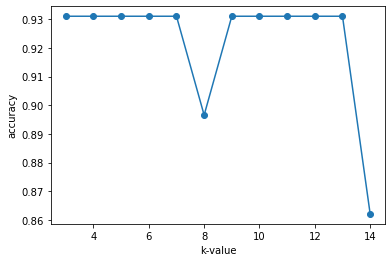

In [47]:
plt.plot(neighbors,acc_values,"o-")
plt.xlabel('k-value')
plt.ylabel('accuracy')

making a model using k as 11; since maximum accuracy is obtained for k=11

In [48]:
classifier=KNeighborsClassifier(n_neighbors=11,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [49]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test, y_pred,pos_label='positive',average='macro'))
print('recall:',recall_score(y_test, y_pred,pos_label='positive',average='macro'))
print('f1_score:',f1_score(y_test, y_pred,pos_label='positive',average='macro'))

accuracy: 0.9310344827586207
precision: 0.9326599326599326
recall: 0.9326599326599326
f1_score: 0.9326599326599326


C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [50]:
a2=accuracy_score(y_test,y_pred)
p2=precision_score(y_test, y_pred,pos_label='positive',average='macro')
r2=recall_score(y_test, y_pred,pos_label='positive',average='macro')
f2=f1_score(y_test, y_pred,pos_label='positive',average='macro')
performance2=pd.DataFrame([a2,p2,r2,f2])
performance2.columns=['K-NN Model']
cm2=confusion_matrix(y_test,y_pred)
cm_df2=pd.DataFrame(cm2,index=['Iris-setosa','Iris-versicolor','Iris-virginica'],columns=['Iris-setosa','Iris-versicolor','Iris-virginica'])

C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


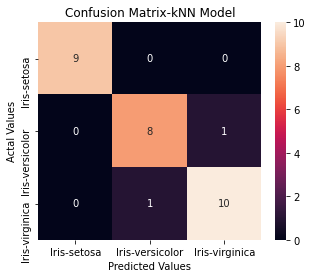

In [51]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df2, annot=True)
plt.title('Confusion Matrix-kNN Model')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

(iii). Decision Tree classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dt_model=DecisionTreeClassifier()

In [54]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [55]:
y_pred=dt_model.predict(x_test)
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test, y_pred,pos_label='positive',average='macro'))
print('recall:',recall_score(y_test, y_pred,pos_label='positive',average='macro'))
print('f1_score:',f1_score(y_test, y_pred,pos_label='positive',average='macro'))

accuracy: 0.896551724137931
precision: 0.9
recall: 0.9023569023569024
f1_score: 0.899749373433584


C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [56]:
a3=accuracy_score(y_test,y_pred)
p3=precision_score(y_test, y_pred,pos_label='positive',average='macro')
r3=recall_score(y_test, y_pred,pos_label='positive',average='macro')
f3=f1_score(y_test, y_pred,pos_label='positive',average='macro')
performance3=pd.DataFrame([a3,p3,r3,f3])
performance3.columns=['Decision Tree classifier']
cm3=confusion_matrix(y_test,y_pred)
cm_df3=pd.DataFrame(cm3,index=['Iris-setosa','Iris-versicolor','Iris-virginica'],columns=['Iris-setosa','Iris-versicolor','Iris-virginica'])
                  

C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


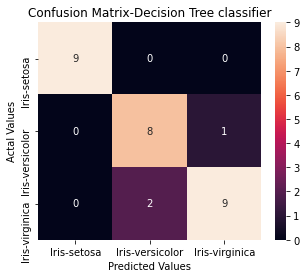

In [57]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df3, annot=True)
plt.title('Confusion Matrix-Decision Tree classifier')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

(iv). SVM

a. Linear SVM

In [58]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test, y_pred,pos_label='positive',average='macro'))
print('recall:',recall_score(y_test, y_pred,pos_label='positive',average='macro'))
print('f1_score:',f1_score(y_test, y_pred,pos_label='positive',average='macro'))

accuracy: 0.896551724137931
precision: 0.9
recall: 0.9023569023569024
f1_score: 0.899749373433584


C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [59]:
a4=accuracy_score(y_test,y_pred)
p4=precision_score(y_test, y_pred,pos_label='positive',average='macro')
r4=recall_score(y_test, y_pred,pos_label='positive',average='macro')
f4=f1_score(y_test, y_pred,pos_label='positive',average='macro')
performance4=pd.DataFrame([a4,p4,r4,f4])
performance4.columns=['Linear SVM']
cm4=confusion_matrix(y_test,y_pred)
cm_df4=pd.DataFrame(cm4,index=['Iris-setosa','Iris-versicolor','Iris-virginica'],columns=['Iris-setosa','Iris-versicolor','Iris-virginica'])
                  

C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


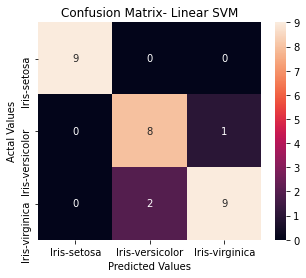

In [60]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df4, annot=True)
plt.title('Confusion Matrix- Linear SVM')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

b.Polynomial SVM

In [61]:
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test, y_pred,pos_label='positive',average='macro'))
print('recall:',recall_score(y_test, y_pred,pos_label='positive',average='macro'))
print('f1_score:',f1_score(y_test, y_pred,pos_label='positive',average='macro'))

accuracy: 0.896551724137931
precision: 0.9
recall: 0.9023569023569024
f1_score: 0.899749373433584


C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [62]:
a5=accuracy_score(y_test,y_pred)
p5=precision_score(y_test, y_pred,pos_label='positive',average='macro')
r5=recall_score(y_test, y_pred,pos_label='positive',average='macro')
f5=f1_score(y_test, y_pred,pos_label='positive',average='macro')
performance5=pd.DataFrame([a5,p5,r5,f5])
performance5.columns=['Polynomial SVM']
cm5=confusion_matrix(y_test,y_pred)
cm_df5=pd.DataFrame(cm5,index=['Iris-setosa','Iris-versicolor','Iris-virginica'],columns=['Iris-setosa','Iris-versicolor','Iris-virginica'])

C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


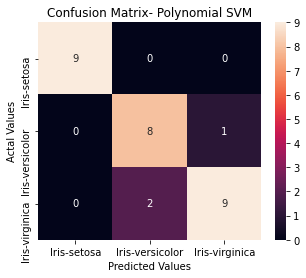

In [63]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df5, annot=True)
plt.title('Confusion Matrix- Polynomial SVM')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

c.Radial SVM

In [64]:
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred=svm_radial.predict(x_test)
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test, y_pred,pos_label='positive',average='macro'))
print('recall:',recall_score(y_test, y_pred,pos_label='positive',average='macro'))
print('f1_score:',f1_score(y_test, y_pred,pos_label='positive',average='macro'))

accuracy: 0.8620689655172413
precision: 0.872053872053872
recall: 0.872053872053872
f1_score: 0.8666666666666666


C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [65]:
a6=accuracy_score(y_test,y_pred)
p6=precision_score(y_test, y_pred,pos_label='positive',average='macro')
r6=recall_score(y_test, y_pred,pos_label='positive',average='macro')
f6=f1_score(y_test, y_pred,pos_label='positive',average='macro')
performance6=pd.DataFrame([a6,p6,r6,f6])
performance6.columns=['Radial SVM']
cm6=confusion_matrix(y_test,y_pred)
cm_df6=pd.DataFrame(cm6,index=['Iris-setosa','Iris-versicolor','Iris-virginica'],columns=['Iris-setosa','Iris-versicolor','Iris-virginica'])

C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


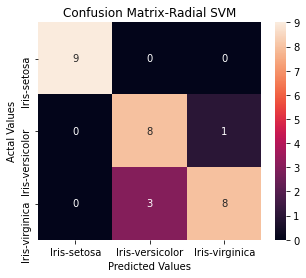

In [66]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df6, annot=True)
plt.title('Confusion Matrix-Radial SVM')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

(v). Random Forest Method

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=150,max_depth=10,random_state=42,criterion='entropy')
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test, y_pred,pos_label='positive',average='macro'))
print('recall:',recall_score(y_test, y_pred,pos_label='positive',average='macro'))
print('f1_score:',f1_score(y_test, y_pred,pos_label='positive',average='macro'))

accuracy: 0.9310344827586207
precision: 0.9326599326599326
recall: 0.9326599326599326
f1_score: 0.9326599326599326


C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [68]:
a7=accuracy_score(y_test,y_pred)
p7=precision_score(y_test, y_pred,pos_label='positive',average='macro')
r7=recall_score(y_test, y_pred,pos_label='positive',average='macro')
f7=f1_score(y_test, y_pred,pos_label='positive',average='macro')
performance7=pd.DataFrame([a7,p7,r7,f7])
performance7.columns=['Random Forest Method']
cm7=confusion_matrix(y_test,y_pred)
cm_df7=pd.DataFrame(cm7,index=['Iris-setosa','Iris-versicolor','Iris-virginica'],columns=['Iris-setosa','Iris-versicolor','Iris-virginica'])

C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


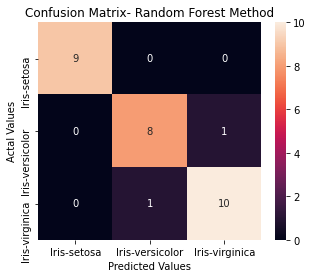

In [69]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df7, annot=True)
plt.title('Confusion Matrix- Random Forest Method')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [70]:
pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)*100

PW    45.583429
PL    38.746856
SL    13.070775
SW     2.598940
dtype: float64

(vi). Gradient Boosting

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test, y_pred,pos_label='positive',average='macro'))
print('recall:',recall_score(y_test, y_pred,pos_label='positive',average='macro'))
print('f1_score:',f1_score(y_test, y_pred,pos_label='positive',average='macro'))

accuracy: 0.9310344827586207
precision: 0.9326599326599326
recall: 0.9326599326599326
f1_score: 0.9326599326599326


C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [78]:
a8=accuracy_score(y_test,y_pred)
p8=precision_score(y_test, y_pred,pos_label='positive',average='macro')
r8=recall_score(y_test, y_pred,pos_label='positive',average='macro')
f8=f1_score(y_test, y_pred,pos_label='positive',average='macro')
performance8=pd.DataFrame([a8,p8,r8,f8])
performance8.columns=[' Gradient Boosting']
cm8=confusion_matrix(y_test,y_pred)
cm_df8=pd.DataFrame(cm8,index=['Iris-setosa','Iris-versicolor','Iris-virginica'],columns=['Iris-setosa','Iris-versicolor','Iris-virginica'])
                  

C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


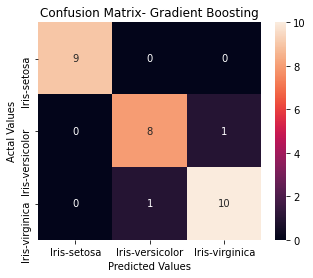

In [79]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df8, annot=True)
plt.title('Confusion Matrix- Gradient Boosting')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

(vii). Extreme Gradient Boosting

In [81]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)

ModuleNotFoundError: No module named 'xgboost'

In [82]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test, y_pred,pos_label='positive',average='macro'))
print('recall:',recall_score(y_test, y_pred,pos_label='positive',average='macro'))
print('f1_score:',f1_score(y_test, y_pred,pos_label='positive',average='macro'))

accuracy: 0.9310344827586207
precision: 0.9326599326599326
recall: 0.9326599326599326
f1_score: 0.9326599326599326


C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [83]:
a9=accuracy_score(y_test,y_pred)
p9=precision_score(y_test, y_pred,pos_label='positive',average='macro')
r9=recall_score(y_test, y_pred,pos_label='positive',average='macro')
f9=f1_score(y_test, y_pred,pos_label='positive',average='macro')
performance9=pd.DataFrame([a9,p9,r9,f9])
performance9.columns=['Extreme Gradient Boosting']
cm9=confusion_matrix(y_test,y_pred)
cm_df9=pd.DataFrame(cm9,index=['Iris-setosa','Iris-versicolor','Iris-virginica'],columns=['Iris-setosa','Iris-versicolor','Iris-virginica'])

C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


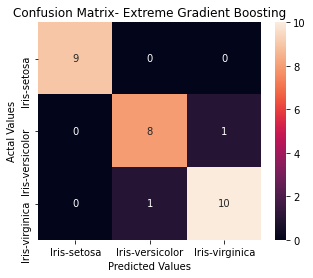

In [84]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df9, annot=True)
plt.title('Confusion Matrix- Extreme Gradient Boosting')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [85]:
performance_comparison=pd.concat([performance1,performance2,performance3,performance4,performance5,performance6,performance7,performance8,performance9],axis=1)
performance_comparison['Performance Metrics']=['Accuracy Score','Precision Score','Recall Score','F1-Score']
performance_comparison=performance_comparison.set_index('Performance Metrics')
performance_comparison

,logistic regression,K-NN Model,Decision Tree classifier,Linear SVM,Polynomial SVM,Radial SVM,Random Forest Method,Gradient Boosting,Extreme Gradient Boosting
Performance Metrics,,,,,,,,,
Accuracy Score,0.931034,0.931034,0.896552,0.896552,0.896552,0.862069,0.931034,0.931034,0.931034
Precision Score,0.932660,0.932660,0.900000,0.900000,0.900000,0.872054,0.932660,0.932660,0.932660
Recall Score,0.932660,0.932660,0.902357,0.902357,0.902357,0.872054,0.932660,0.932660,0.932660
F1-Score,0.932660,0.932660,0.899749,0.899749,0.899749,0.866667,0.932660,0.932660,0.932660


Inference:Considering the Accuracy and F1 Scores; the Random Forest,Gradient Boosting,K-NN Model,logistic regression all provides better models for this iris-dataset